# （リーマン）積分

<IPython.core.display.Javascript object>


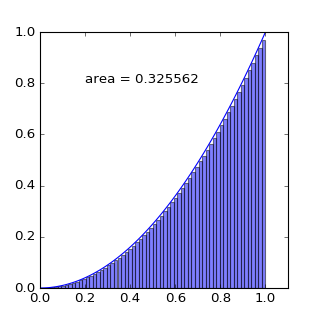

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    y = x ** 2
    return y

fig = plt.figure(figsize=(4, 4))
images = []
step = 0.5
for _ in range(12):
    subplot = fig.add_subplot(1, 1, 1)
    subplot.set_xlim(0, 1.1)
    subplot.set_ylim(0)
    linex = np.linspace(0, 1, 100)
    subimages = []

    im, = subplot.plot(linex, f(linex), color='blue')
    subimages.append(im)

    area = 0
    for x0 in np.arange(0, 1, step):
        rect = plt.Rectangle((x0, 0), step, f(x0), alpha=0.5)
        im = subplot.add_patch(rect)
        subimages.append(im)
        area += step * f(x0)
    im = subplot.text(0.2, 0.8, ('area = %f' % area))
    subimages.append(im)
    images.append(subimages)
    if step > 0.002:
        step *= 0.5

ani = animation.ArtistAnimation(fig, images, interval=1000, repeat_delay=1000)
plt.show()

# 微分係数

<IPython.core.display.Javascript object>


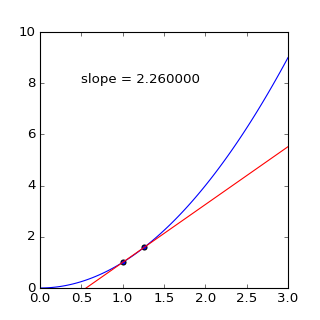

In [2]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x0 = 1.0

def f(x):
    return x**2

fig = plt.figure(figsize=(4, 4))

images = []
for i, dx in enumerate(
    np.hstack((np.arange(1.5, 0, -0.02), np.array([10**(-10)] * 50)))):
    subplot = fig.add_subplot(1, 1, 1)
    subplot.set_xlim(0, 3)
    subplot.set_ylim(0, 10)
    slope = (f(x0 + dx) - f(x0)) / dx
    linex = np.linspace(0, 3, 100)
    image0 = subplot.text(0.5, 8, ('slope = %f' % slope))
    image1, = subplot.plot(linex, f(linex), color='blue')
    image2 = subplot.scatter([x0, x0 + dx], [f(x0), f(x0 + dx)])

    def g(x):
        return f(x0) + slope * (x - x0)
    
    image3, = subplot.plot([0, 3], [g(0), g(3)], linewidth=1, color='red')
    images.append([image0, image1, image2, image3])

ani = animation.ArtistAnimation(fig, images, interval=20, repeat_delay=80)
plt.show()

# フーリエ級数

## $f(x) = x$ の近似

<IPython.core.display.Javascript object>


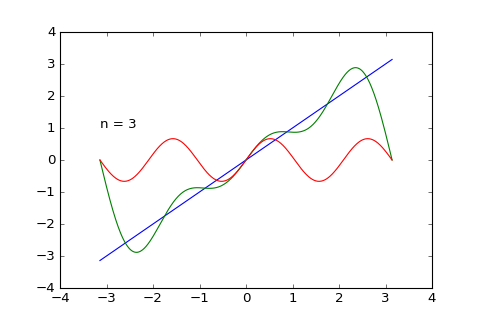

In [2]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad

def fourier(f, n_max):
    a, b = [], []
    for n in range(n_max+1):
        res, err = quad(lambda x:f(x) * np.cos(n*x), -np.pi, np.pi)
        a.append(res/np.pi)
        res, err = quad(lambda x:f(x) * np.sin(n*x), -np.pi, np.pi)
        b.append(res/np.pi)

    def fn(x):
        sum = a[0] / 2
        for n in range(1, 1+n_max):
            sum += a[n]*np.cos(n*x) + b[n]*np.sin(n*x)
        return sum

    def lastfn(x):
        return a[n_max]*np.cos(n_max*x)+b[n_max]*np.sin(n_max*x)
    
    return fn, lastfn

def make_fourier(f, n_max):
    fig = plt.figure(figsize=(6,4))
    subplot = fig.add_subplot(1,1,1)

    y1s, y2s, y3s = [], [], []
    y1, y2, y3 = 0, 0, 0

    images = []
    xs = np.linspace(-np.pi,np.pi,500)
    y1s = f(xs)
    for n in range(1, n_max+1):
        image1, = subplot.plot(xs, y1s, color='blue')
        g, h = fourier(f, n)
        y2s = g(xs)
        y3s = h(xs)
        image2, = subplot.plot(xs, y2s, color='green')
        image3, = subplot.plot(xs, y3s, color='red')
        image4 = subplot.text(-np.pi, 1.0, ('n = %d' % n))
        images.append([image1, image2, image3, image4])

    ani = animation.ArtistAnimation(fig, images, interval=1000)
    return ani

def f(x):
    return x

make_fourier(f, 20)

## $f(x) = 0.1 x^3$ のフーリエ級数

<IPython.core.display.Javascript object>


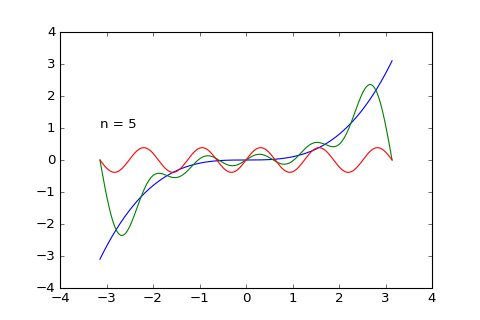

In [3]:
def f(x):
    return 0.1 * x**3

make_fourier(f, 20)

## 符号関数 $\mathrm{sgn}(x)$ のフーリエ級数

<IPython.core.display.Javascript object>


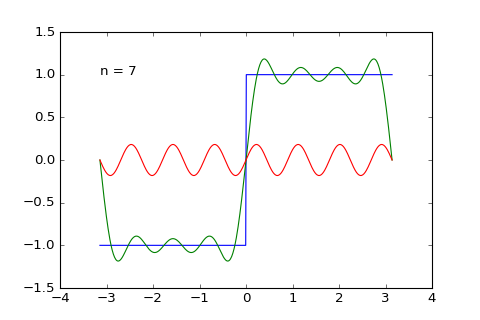

In [4]:
def f(x):
    return np.sign(x) 

make_fourier(f, 20)

## $(x-3)(x+3)(x-1)(x+1)$ のフーリエ級数

<IPython.core.display.Javascript object>


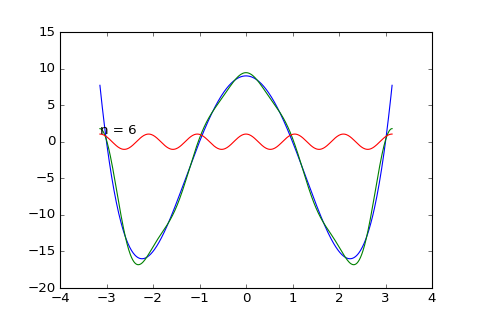

In [5]:
def f(x):
    return (x-3)*(x+3)*(x-1)*(x+1)

make_fourier(f, 20)